In [17]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
header_list = ['Class', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash',
               'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols',
               'Proanthocyanins','Color intensity', 'Hue','OD', 'Proline']

In [6]:
df = pd.read_csv('wine.csv', names= header_list)

In [7]:
# Separate y and data

y = df['Class']
df.drop(['Class'], axis = 1, inplace = True)
X = df

In [8]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
kf = KFold(n_splits=5, random_state= 42, shuffle= True)

In [10]:
kNN = KNeighborsClassifier()

In [11]:
cross_val_score(kNN,X,y, cv = kf)

array([0.72222222, 0.61111111, 0.61111111, 0.68571429, 0.74285714])

In [12]:
neighbors = np.arange(1,51,1)

In [18]:
list_neighbors = []
list_cv_score = []
cross_dict = {}
for i in tqdm(range(1,51)):
    a = cross_val_score(KNeighborsClassifier(n_neighbors=i),X,y, cv = kf, scoring= 'accuracy').mean()
    list_cv_score.append(a)
    list_neighbors.append(i)
    cross_dict[a] = i
    
list_neighbors = np.array(list_neighbors)
list_cv_score = np.array(list_cv_score)
    
    

100%|██████████████████████████████████████████| 50/50 [00:02<00:00, 22.20it/s]


The optimal number of neighbors is 1


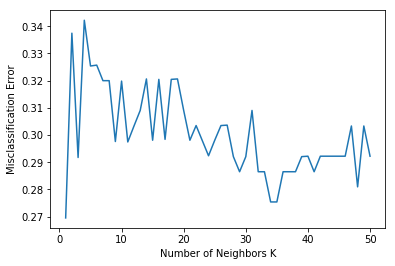

In [19]:
MSE = [1 - x for x in list_cv_score]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

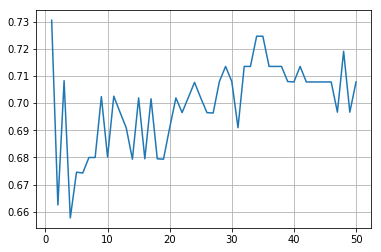

In [47]:
plt.plot(list_neighbors, list_cv_score)
plt.grid(True)
plt.show()

In [48]:
max(list_cv_score)

0.7304761904761905

In [49]:
cross_dict[max(list_cv_score)]

1

In [20]:
New_x = scale(X)

C:\Users\PythonCode\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


100%|██████████████████████████████████████████| 50/50 [00:01<00:00, 37.59it/s]


The optimal number of neighbors is 29


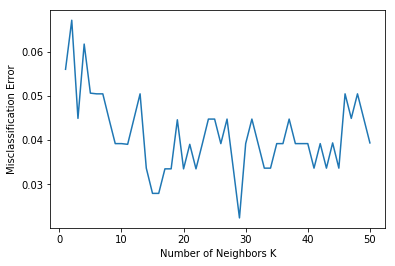

In [23]:
list_neighbors = []
list_cv_score = []
cross_dict = {}
for i in tqdm(range(1,51)):
    a = cross_val_score(KNeighborsClassifier(n_neighbors=i),New_x,y, cv = kf, scoring= 'accuracy').mean()
    list_cv_score.append(a)
    list_neighbors.append(i)
    cross_dict[a] = i
    
list_neighbors = np.array(list_neighbors)
list_cv_score = np.array(list_cv_score)

MSE = [1 - x for x in list_cv_score]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [24]:
print(cross_dict[max(list_cv_score)], max(list_cv_score))

29 0.9776190476190475


In [51]:
tuned_parameters = [{'n_neighbors': neighbors}]
clf = GridSearchCV(kNN, tuned_parameters, cv = kf)
clf.fit(X,y)

C:\Users\PythonCode\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
scores = clf.cv_results_['mean_test_score']

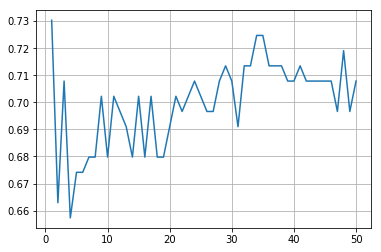

In [54]:
plt.plot(neighbors, scores)
plt.grid(True)
plt.show()